In [78]:
%run dataframe.ipynb

Host Shape: rows: 4816389 and columns: 29
Summary Shape: rows: 2611 and columns: 33
EvtWarn Shape: rows: 39992 and columns: 36
RvBsm Shape: rows: 491 and columns: 18
Spat Shape: rows: 19389 and columns: 11
Headlamp: {0, 2, 3, -1}
Wiper: {0, 1, 2, 3, -1}
Turn Signal: {0, 1, 2, -1}
Stability Control Status: {0, -1}
Transition State: {0, 1, 2, 3, -1}
Traction Control Status: {0, 1, -2, -7, -6, -4, -3, -1}
Brake Status: {0, 1, -1}
Speed: 1000.0
Yaw Rate: 1000.0
No. of -1s in Headlamp :  43317
No. of -1s in Wiper :  43317
No. of -1s in Turn Signal :  43317
No. of -1s in Stability Control Status :  43317
No. of <0s in Transition State :  43317
No. of -1s in Headlamp :  43317
No. of -1s in Headlamp :  43317
No. of Speed at 1,000 :  43317
No. of Yaw Rate at 1,000 :  43317
No. of -1s in Headlamp :  0
No. of -1s in Wiper :  0
No. of -1s in Turn Signal :  0
No. of -1s in Stability Control Status :  0
No. of <0s in Transition State :  0
No. of -1s in Headlamp :  0
No. of -1s in Headlamp :  0
No. o

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mat
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()

# HOST Data

## Subset Creation

In [80]:
df_host_subset = df_host.sample(n=1000000)
df_host_subset.head()

,brakestatus,device,headlamp,speed,stabilitycontrolstatus,traccontrolstatus,transstate,turnsignal,wiper,yawrate
861936,0,101452,0,9.895445,0,0,2,0,0,0.540852
2473119,0,101260,0,28.186111,0,0,2,2,0,0.976547
3861252,0,101735,0,28.488888,0,0,2,0,0,-0.000015
3487466,0,102629,0,2.061111,0,0,2,0,0,-0.488297
1475214,0,101160,0,25.577776,0,0,2,0,0,7.324204


## Correlation Matrix

<AxesSubplot:>

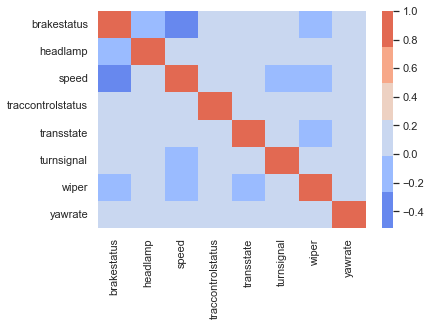

In [81]:
# creating a colormap
colormap = sns.color_palette("coolwarm")
df_host_scs = df_host[['brakestatus', 'headlamp', 'speed', 'traccontrolstatus', 'transstate', 'turnsignal', 'wiper', 'yawrate']]
sns.heatmap(df_host_scs.corr(), cmap=colormap)

### Insights

- There appears to be no strong correlation between any of the features
- Some correlation near 0.20 include
    - Brake Status vs Traction Control, Transition State, Turn Signal, and YawRate
    - Headlamp vs (All) Traction Control, Transition State, Turn Signal, Wiper, and Speed, and YawRate
    - Speed vs Traction Control, Transition State, and Yaw Rate
    - Traction Control vs (All)
    - Transition State vs everything but wiper
    - Turn Signal vs Headlamp, Traction Control, Transition State, Wiper, and YawRate
    - Wiper vs Headlamp, Traction Control, Turn Signal, and YawRate

Overall, it seems that the wiper is the odd one out.

## Plotting

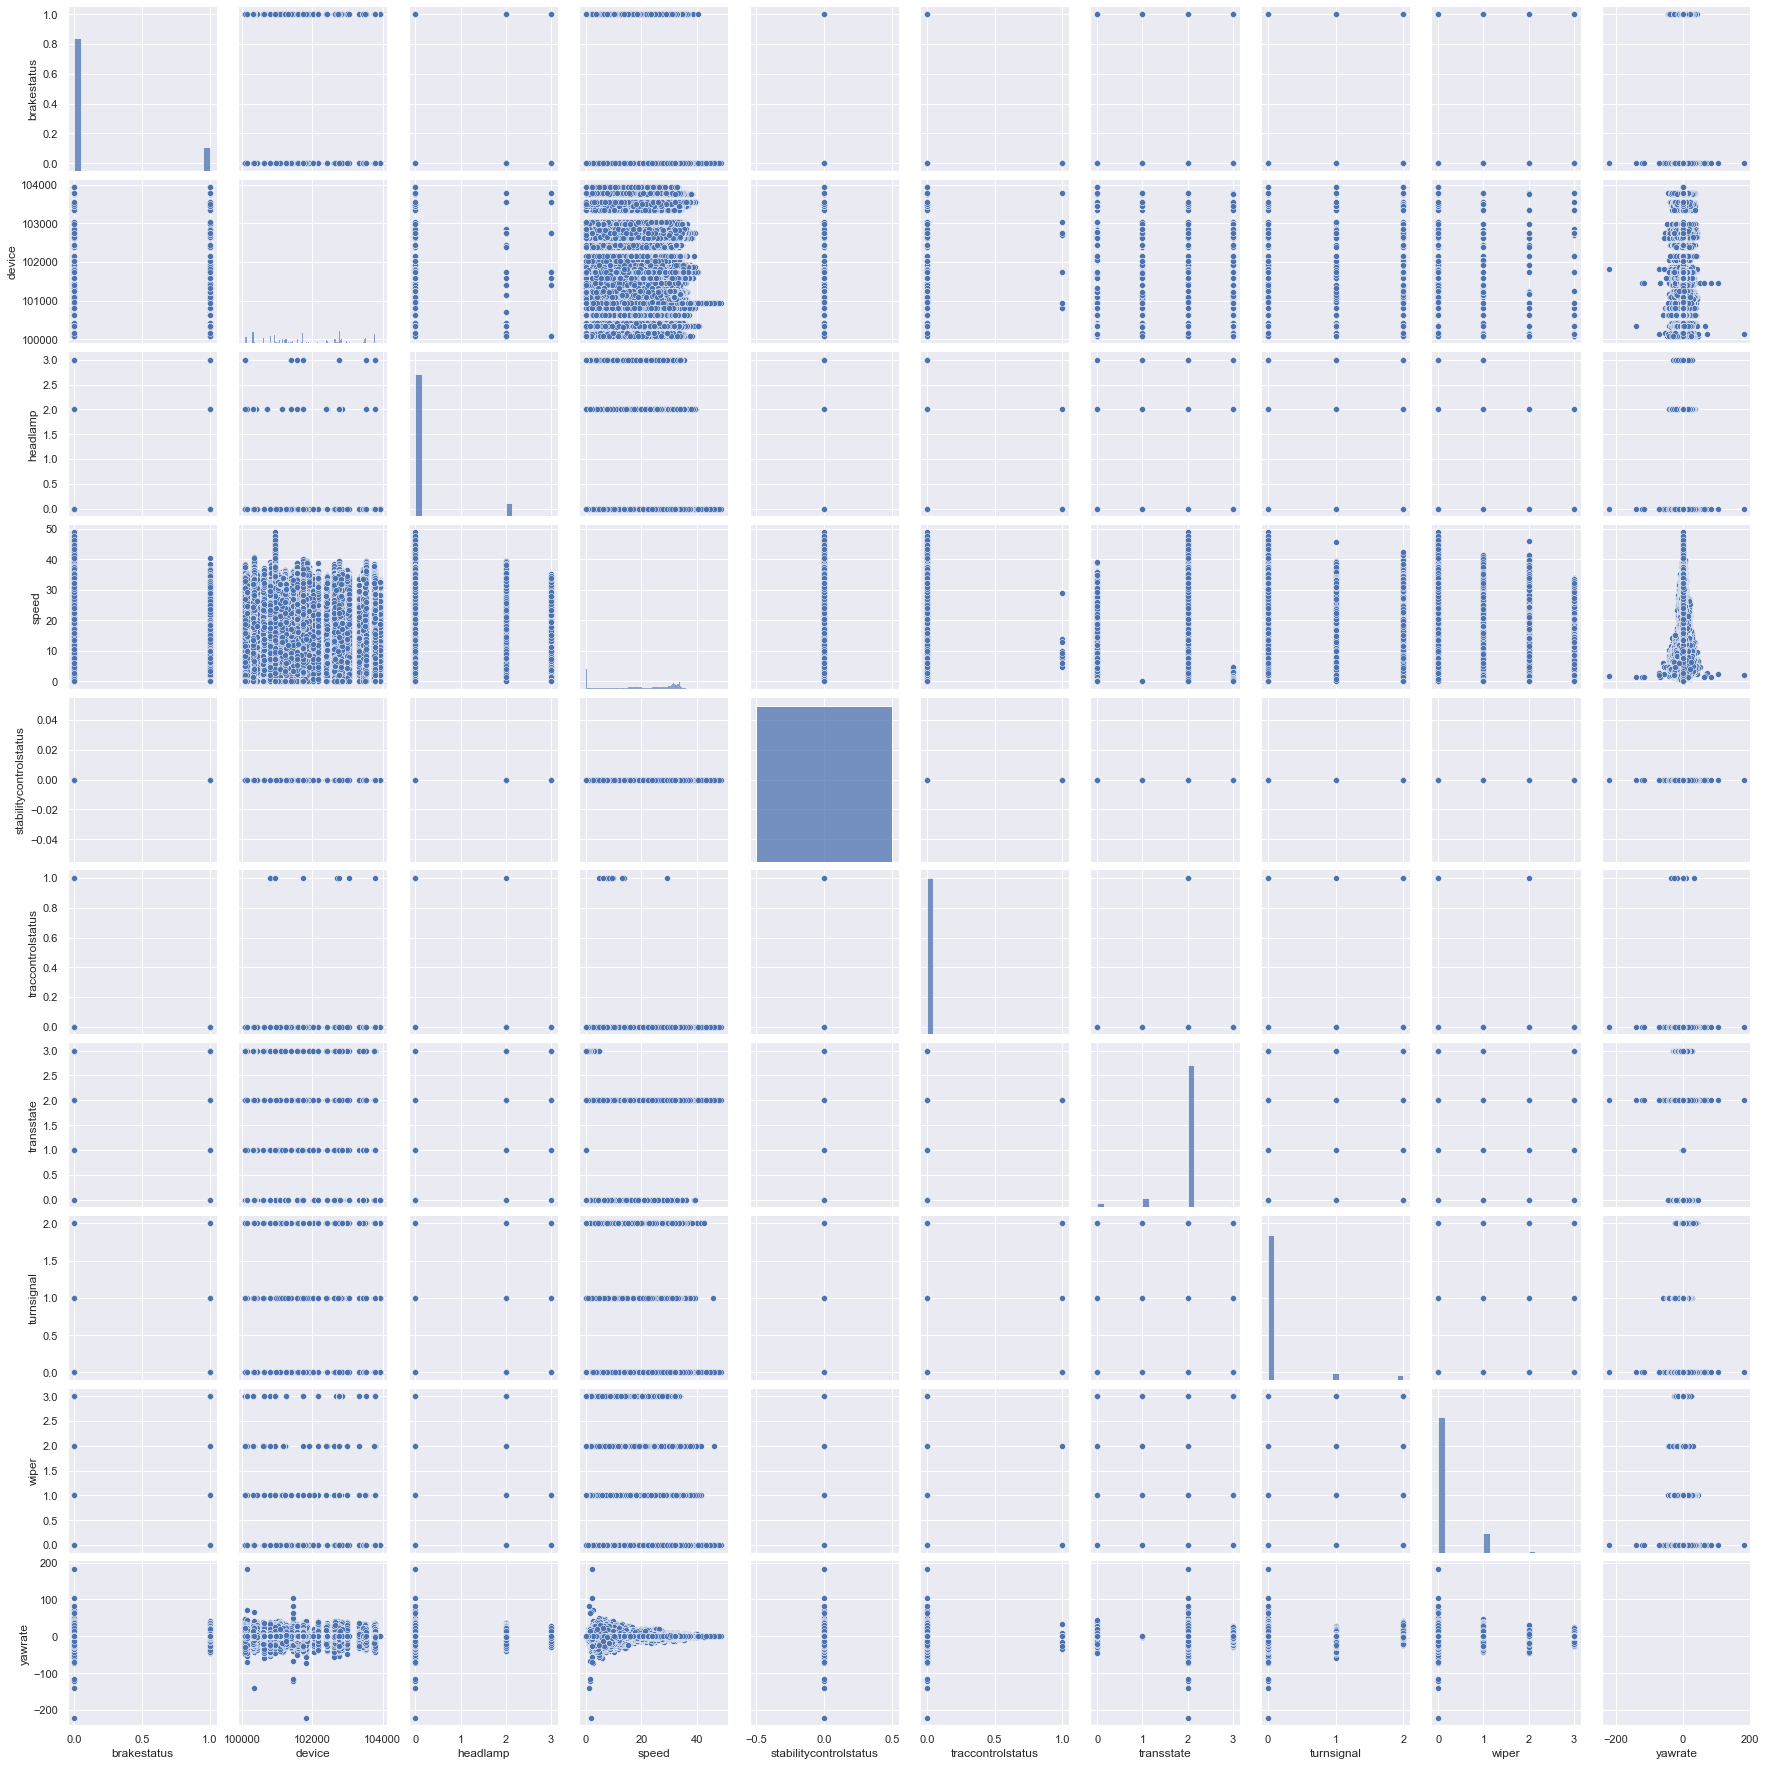

In [82]:
sns.pairplot(df_host_subset, dropna = True)

## Insights

- When headlamp is on, people tend to not go as fast (Headlamp vs Speed)
- When speed increases, the yaw rate gradually goes to zero (Speed vs Yaw Rate)
- When speed increases people generally don't use their turn signals (Speed vs Turn Signal)
- When people in transtate #2, yaw rate is more dispersed

In [83]:
column_names = list(df_host_subset.columns)


### Bar Plots

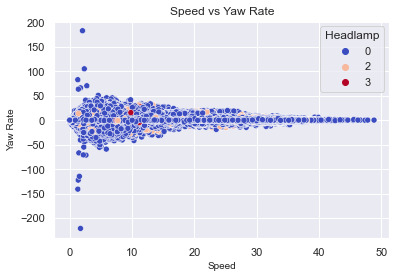

In [84]:
# Speed vs Yaw Rate (Headlamp)

headlamp_syw = sns.scatterplot(x='speed', y='yawrate', hue='headlamp', data=df_host_subset, palette='coolwarm')
headlamp_syw.set(title='Speed vs Yaw Rate')
headlamp_syw.set_xlabel("Speed", fontsize = 10)
headlamp_syw.set_ylabel("Yaw Rate", fontsize = 10)
plt.legend(title='Headlamp')

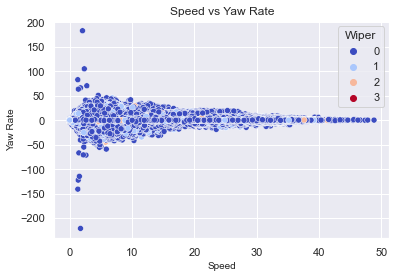

In [85]:
# Speed vs Yaw Rate (Wipers)
wiper_syw = sns.scatterplot(x='speed', y='yawrate', hue='wiper', data=df_host_subset, palette='coolwarm')
wiper_syw.set(title='Speed vs Yaw Rate')
wiper_syw.set_xlabel("Speed", fontsize = 10)
wiper_syw.set_ylabel("Yaw Rate", fontsize = 10)
plt.legend(title='Wiper')

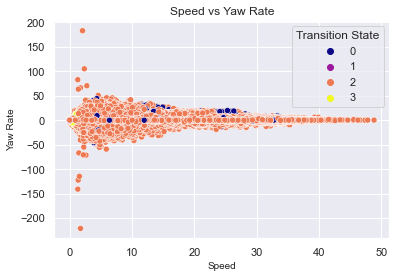

In [94]:
# Speed vs Headlamp
transtate_syw = sns.scatterplot(x='speed', y='yawrate', hue='transstate', data=df_host_subset, palette='plasma')
transtate_syw.set(title='Speed vs Yaw Rate')
transtate_syw.set_xlabel("Speed", fontsize = 10)
transtate_syw.set_ylabel("Yaw Rate", fontsize = 10)
plt.legend(title='Transition State')

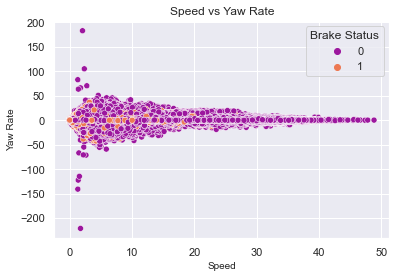

In [87]:
# Speed vs Yaw Rate (Brake Status)
transtate_syw = sns.scatterplot(x='speed', y='yawrate', hue='brakestatus', data=df_host_subset, palette='plasma')
transtate_syw.set(title='Speed vs Yaw Rate')
transtate_syw.set_xlabel("Speed", fontsize = 10)
transtate_syw.set_ylabel("Yaw Rate", fontsize = 10)
plt.legend(title='Brake Status')

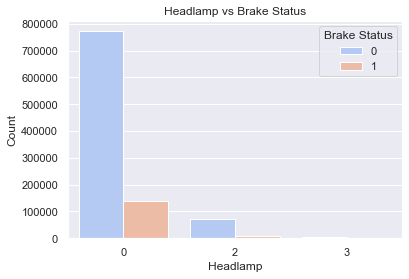

In [91]:
# Brake Status vs Headlamp
bshd_syw = sns.countplot(x='headlamp', hue='brakestatus', data=df_host_subset, palette='coolwarm')
bshd_syw.set(xlabel ="Headlamp", ylabel = "Count", title ='Headlamp vs Brake Status')
plt.legend(title='Brake Status')

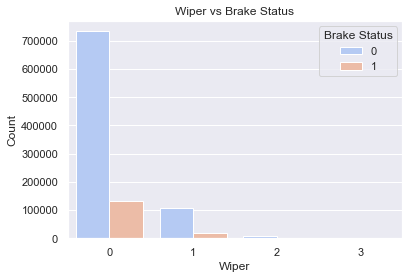

In [92]:
# Brake Status vs Wiper
bshd_syw = sns.countplot(x='wiper', hue='brakestatus', data=df_host_subset, palette='coolwarm')
bshd_syw.set(xlabel ="Wiper", ylabel = "Count", title ='Wiper vs Brake Status')
plt.legend(title='Brake Status')

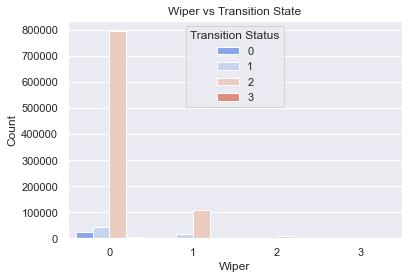

In [93]:
# Wiper vs Transition State
bshd_syw = sns.countplot(x='wiper', hue='transstate', data=df_host_subset, palette='coolwarm')
bshd_syw.set(xlabel ="Wiper", ylabel = "Count", title ='Wiper vs Transition State')
plt.legend(title='Transition Status')

In [4]:
df_host_subset_means = pd.read_csv('kmeans_df_host_subset_with_clusters.csv')

<AxesSubplot:xlabel='speed', ylabel='yawrate'>

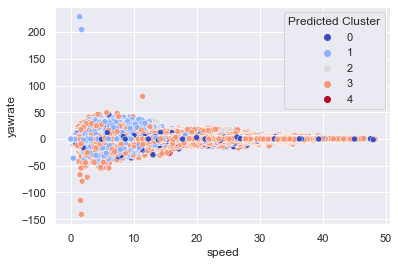

In [9]:
sns.scatterplot(x='speed', y='yawrate', hue='Predicted Cluster', data=df_host_subset_means, palette='coolwarm')